In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
hj = pd.read_csv("hj.csv")
rb = pd.read_csv("rb.csv", sep=';')

In [6]:
rb.head()

,s0,x1(0),x2(0),x1*,x2*,y*,function_calls
0,0.1,-0.116490,0.524946,-8.471650e-09,0.774716,0.619837,386
1,0.1,-0.801163,-0.315184,-7.747157e-01,0.000002,0.619837,230
2,0.1,0.010915,0.677807,8.495541e-06,0.774716,0.619837,86
3,0.1,-0.597656,0.428152,-7.747157e-01,0.774716,1.239674,346
4,0.1,-0.053871,-0.567340,-1.296376e-09,-0.774721,0.619837,330


In [90]:
rb[rb["y*"] < 2.5 ]

,s0,x1(0),x2(0),x1*,x2*,y*,function_calls
0,0.500,-3.890326,0.537431,2.316479e-09,7.196075e-10,-1.998000,239
1,0.500,-3.120359,3.400928,7.747157e-01,7.747157e-01,-0.758326,228
2,0.500,3.120736,0.653361,-2.711532e-09,7.747157e-01,-1.378163,264
3,0.500,3.778053,0.888923,3.436984e-10,7.747157e-01,-1.378163,243
4,0.500,-2.533782,3.843519,7.747157e-01,-1.014495e-10,-1.378163,236
...,...,...,...,...,...,...,...
293,0.005,-4.856567,0.500682,-2.234322e-10,7.747157e-01,-1.378163,237
295,0.005,3.384420,4.193122,7.747157e-01,-8.600357e-10,-1.378163,278
297,0.005,-0.011375,-4.251526,-7.361617e-10,7.747157e-01,-1.378163,256
298,0.005,-2.877576,1.632478,-2.099748e-09,1.548395e+00,0.480545,270


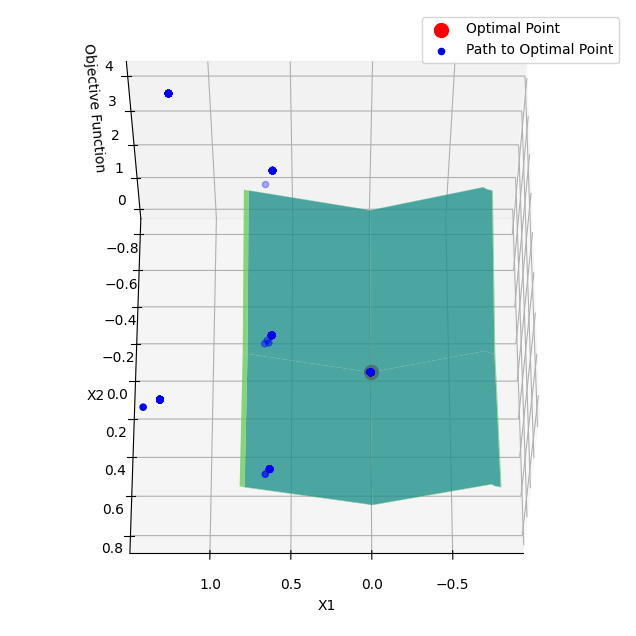

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2 + x[1]**2 - np.cos(2.5 * np.pi * x[0]) - np.cos(2.5 * np.pi * x[1]) + 2

def hooke_jeeves(initial_point, step_size, epsilon):
    current_point = np.array(initial_point)
    path = [current_point.copy()]

    while step_size > epsilon:
        best_point = np.array(current_point)
        best_value = objective_function(current_point)

        for i in range(len(current_point)):
            forward_point = np.array(current_point)
            forward_point[i] += step_size
            forward_value = objective_function(forward_point)

            backward_point = np.array(current_point)
            backward_point[i] -= step_size
            backward_value = objective_function(backward_point)

            if forward_value < best_value:
                best_point = forward_point
                best_value = forward_value
            elif backward_value < best_value:
                best_point = backward_point
                best_value = backward_value

        if best_value >= objective_function(current_point):
            step_size /= 2
        else:
            current_point = best_point
            path.append(current_point.copy())

    return current_point, np.array(path)

initial_point = [1, 1]
step_size = 0.5
epsilon = 0.01

optimal_point, path = hooke_jeeves(initial_point, step_size, epsilon)
path = np.array([[i, j] for i, j in zip(rb[rb["y*"] < 2.5 ]["y*"], rb[rb["y*"] < 2.5 ]["x1*"])])
# x = np.linspace(-2, 2, 100)
# y = np.linspace(-2, 2, 100)
x = rb["x2*"].sort_values()
y = rb["x1*"].sort_values()
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

# Увеличенный размер графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(optimal_point[0], optimal_point[1], objective_function(optimal_point), color='red', marker='o', s=100, label='Optimal Point')
ax.scatter(path[:, 0], path[:, 1], [objective_function(p) for p in path], color='blue', marker='o', label='Path to Optimal Point')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objective Function')
ax.legend()

ax.view_init(elev=60, azim=90)  

plt.show()


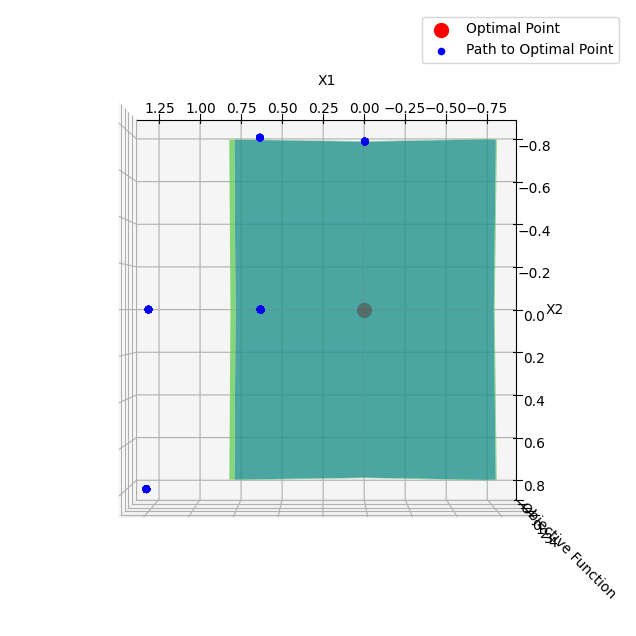

In [20]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2 + x[1]**2 - np.cos(2.5 * np.pi * x[0]) - np.cos(2.5 * np.pi * x[1]) + 2

def hooke_jeeves(initial_point, step_size, epsilon):
    current_point = np.array(initial_point)
    path = [current_point.copy()]

    while step_size > epsilon:
        best_point = np.array(current_point)
        best_value = objective_function(current_point)

        for i in range(len(current_point)):
            forward_point = np.array(current_point)
            forward_point[i] += step_size
            forward_value = objective_function(forward_point)

            backward_point = np.array(current_point)
            backward_point[i] -= step_size
            backward_value = objective_function(backward_point)

            if forward_value < best_value:
                best_point = forward_point
                best_value = forward_value
            elif backward_value < best_value:
                best_point = backward_point
                best_value = backward_value

        if best_value >= objective_function(current_point):
            step_size /= 2
        else:
            current_point = best_point
            path.append(current_point.copy())

    return current_point, np.array(path)

initial_point = [1, 1]
step_size = 0.5
epsilon = 0.01



optimal_point, path = hooke_jeeves(initial_point, step_size, epsilon)
path = np.array([[i, j] for i, j in zip(hj["y*"].sort_values(), hj["x1*"].sort_values())])
# x = np.linspace(-2, 2, 100)
# y = np.linspace(-2, 2, 100)
x = rb["x2*"].sort_values()
y = rb["x1*"].sort_values()
X, Y = np.meshgrid(x, y)
Z = objective_function([X, Y])

# Увеличенный размер графика
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='viridis', alpha=0.8)
ax.scatter(optimal_point[0], optimal_point[1], objective_function(optimal_point), color='red', marker='o', s=100, label='Optimal Point')
ax.scatter(path[:, 0], path[:, 1], [objective_function(p) for p in path], color='blue', marker='o', label='Path to Optimal Point')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Objective Function')
ax.legend()

# Изменяем ориентацию графика
ax.view_init(elev=90, azim=90)  # Задайте углы элевации и азимута

plt.show()


In [51]:
# rb["x2*"].sort_values()
# rb["x1*"].sort_values()

array([0, 0])

In [53]:
path = np.array([[i, j] for i, j in zip(rb["x2*"], rb["x1*"])])

In [54]:
path

array([[ 7.19607485e-10,  2.31647901e-09],
       [ 7.74715711e-01,  7.74715711e-01],
       [ 7.74715712e-01, -2.71153233e-09],
       [ 7.74715709e-01,  3.43698403e-10],
       [-1.01449515e-10,  7.74715711e-01],
       [-7.74715711e-01,  7.74715711e-01],
       [-7.74715711e-01, -6.55209220e-10],
       [-1.64010272e-09,  7.74715713e-01],
       [ 7.74715709e-01, -1.54839543e+00],
       [ 7.74715708e-01, -7.74715711e-01],
       [ 7.74715699e-01, -7.74715709e-01],
       [ 2.31954581e+00, -5.01016117e-10],
       [ 7.74715709e-01,  7.74715712e-01],
       [ 7.74715710e-01,  1.18568266e-10],
       [-6.54150512e-10, -7.74715710e-01],
       [-7.74715710e-01, -7.74715712e-01],
       [ 7.74715708e-01, -1.40876200e-10],
       [ 1.27278876e-09, -6.26087626e-10],
       [ 4.86672036e-10,  1.54839544e+00],
       [ 2.31954580e+00,  7.74715711e-01],
       [-2.46744847e-10, -7.74715710e-01],
       [-7.74715708e-01, -1.55534163e-09],
       [-7.74715709e-01,  1.00458930e-09],
       [ 7.

In [50]:
path

array([[1, 1],
       [1, 0],
       [0, 0]])

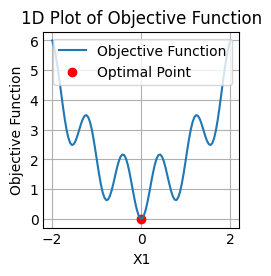

In [38]:
import numpy as np
import matplotlib.pyplot as plt

def objective_function(x):
    return x[0]**2 + x[1]**2 - np.cos(2.5 * np.pi * x[0]) - np.cos(2.5 * np.pi * x[1]) + 2

def hooke_jeeves_1d(x1_values, x2_fixed, step_size, epsilon):
    path = []

    for x1 in x1_values:
        current_point = [x1, x2_fixed]
        path.append(objective_function(current_point))

    return np.array(path)

x1_values = np.linspace(-2, 2, 100)
x2_fixed = 0  # Фиксируем значение x2

# Получаем значения функции для каждого x1
y_values = hooke_jeeves_1d(x1_values, x2_fixed, step_size=0.1, epsilon=0.01)

# Построение графика
plt.plot(x1_values, y_values, label='Objective Function')
plt.scatter(optimal_point[0], objective_function(optimal_point), color='red', marker='o', label='Optimal Point')
plt.xlabel('X1')
plt.ylabel('Objective Function')
plt.legend()
plt.title('1D Plot of Objective Function')

plt.show()


In [22]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import minimize
import pandas as pd

# Функция для интеграции уравнений движения
def model(y, t, k1, k2):
    alpha, omega = y
    alpha_ref = np.pi  # Угловая цель
    omega_ref = 0.0  # Целевая угловая скорость
    M = k1 * (alpha_ref - alpha) + k2 * (omega_ref - omega)  # Момент силы
    I = 1/3 + 1  # Момент инерции
    b = 0.5  # Коэффициент тарировочного трения
    dydt = [omega, (M - b * omega) / I]
    return dydt

# Функция для оптимизации
def objective_function(params):
    global calls
    calls += 1
    k1, k2 = params
    t_span = np.arange(0, 100, 0.5)  # Временной интервал с шагом 0.5
    initial_conditions = [0, 0]  # Начальные условия для угла и угловой скорости
    solution = odeint(model, initial_conditions, t_span, args=(k1, k2))
    Q = np.trapz((10 * (np.pi - solution[:, 0])**2 + solution[:, 1]**2 + (k1 * (np.pi - solution[:, 0]) + k2 * solution[:, 1])**2), t_span)
    return Q

# Создание DataFrame для хранения результатов
results_df = pd.DataFrame(columns=['Długość kroku', 'k1*', 'k2*', 'Q*', 'Liczba wywołań funkcji celu'])

# Оптимизация методом Hooke’a-Jeevesa
initial_guess = [0, 0]
result_hj = minimize(objective_function, initial_guess, method='Powell', options={'initial_simplex': np.array([[0.5, 0], [0, 0.5]])})

# Заполнение таблицы результатов
results_df.loc['Hooke’a-Jeevesa'] = [result_hj.get('nit'), result_hj.x[0], result_hj.x[1], result_hj.fun, calls]

# Сброс счетчика вызовов
calls = 0

# Оптимизация методом Rosenbrocka
result_rb = minimize(objective_function, initial_guess, method='BFGS', options={'gtol': 0.5})

# Заполнение таблицы результатов
results_df.loc['Rosenbrock'] = [result_rb.get('nit'), result_rb.x[0], result_rb.x[1], result_rb.fun, calls]

# Вывод результатов
print(results_df)


/var/folders/h5/64qykf294zn3ggth49z4d8pm0000gn/T/ipykernel_63749/3317817713.py:33: OptimizeWarning: Unknown solver options: initial_simplex
  result_hj = minimize(objective_function, initial_guess, method='Powell', options={'initial_simplex': np.array([[0.5, 0], [0, 0.5]])})


NameError: name 'calls' is not defined

In [19]:
result_df.head()

,Długość kroku,k1*,k2*,Q*,Liczba wywołań funkcji celu
0,1.098373e-09,-1.098373e-09,-1.098373e-09,0.0,38
